In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Aufgabe 1

## 1a) Datenimport

In [2]:
df = pd.read_csv("lego-datensatz.csv", encoding="iso-8859-1")
df

,Set_Nr,Set_Name,Themenwelt,Teile,Preis,Amazon,Jahr,Alter,Seiten,Minifiguren,Verpackung,Gewicht,Unique,Vertrieb,Groesse
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


## 1b) Datenbereinigung

In [3]:
def convert_to_float(x):
    if type(x) == float:
        return x
    else:
        return float(x.replace('$', ''))

df['Preis'] = df['Preis'].apply(lambda x: convert_to_float(x))
df['Amazon'] = df['Amazon'].apply(lambda x: convert_to_float(x))

df


,Set_Nr,Set_Name,Themenwelt,Teile,Preis,Amazon,Jahr,Alter,Seiten,Minifiguren,Verpackung,Gewicht,Unique,Vertrieb,Groesse
0,41916,Extra Dots - Series 2,DOTS,109.0,3.99,3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,3.99,3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,4.99,4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,4.99,4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,4.99,4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


## 1c) Datenbereinigung

In [4]:
def convert_kg(x):
    if type(x) == float:
        return x
    else:
        x = re.sub(pattern="Kg.*", repl="", string=x)
        return float(x)


df['Gewicht'] = df['Gewicht'].apply(lambda x: convert_kg(x))

for element in df['Gewicht']:
    print(element)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.15
nan
nan
nan
0.26
nan
nan
nan
0.15
0.15
nan
nan
0.25
0.18
nan
0.1
0.13
0.14
0.14
0.16
0.1
nan
nan
nan
0.12
nan
0.14
0.15
0.15
0.13
nan
0.14
0.13
0.13
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.17
nan
nan
0.24
0.12
nan
0.25
nan
nan
0.2
0.08
0.14
nan
0.23
0.25
0.27
0.31
nan
nan
nan
nan
nan
0.1
nan
0.2
nan
nan
nan
nan
0.08
nan
0.28
nan
nan
nan
nan
nan
nan
0.13
nan
nan
0.16
0.24
0.22
0.19
nan
nan
nan
0.13
nan
0.27
nan
nan
0.84
nan
nan
nan
nan
nan
nan
0.29
nan
0.36
0.38
0.35
nan
nan
0.64
0.39
nan
0.34
0.25
0.31
nan
nan
nan
nan
nan
0.09
nan
nan
0.39
nan
nan
0.14
nan
nan
nan
nan
0.44
nan
nan
nan
0.29
nan
nan
nan
0.37
0.14
nan
nan
nan
nan
nan
0.44
0.36
0.38
nan
nan
nan
0.45
0.36
0.66
0.13
nan
nan
0.34
nan
nan
nan
0.32
0.08
nan
nan
0.14
nan
0.16
nan
0.27
nan
0.09
0.15
nan
nan
nan
nan
0.19
nan
nan
nan
nan
nan
0.23
0.09
0.17
nan
0.1
nan
nan
nan
nan
nan
nan
nan
0.32
nan
nan
nan
nan
0.34
nan
nan
nan
nan
0.24
nan
0.24
nan
nan
nan
0.31
nan
nan
na

## 1d) Korrelationsmatrix

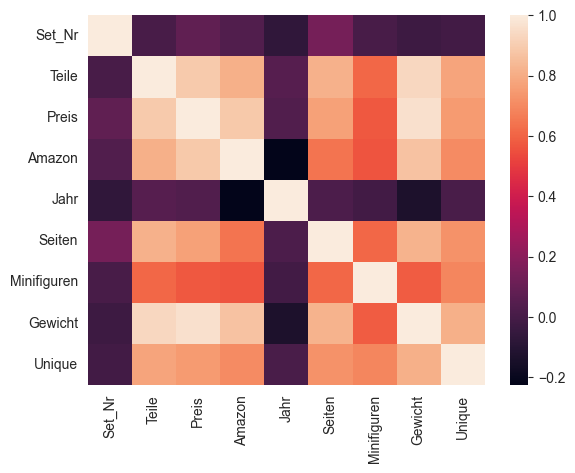

In [5]:
sns.heatmap(df[['Set_Nr', 'Teile', 'Preis', 'Amazon', 'Jahr', 'Seiten', 'Minifiguren', 'Gewicht', 'Unique']].corr())
plt.show()


### Interpretation
Die Korrelationsmatrix zeigt, dass die Variablen `Teile` und `Preis` eine starke positive Korrelation aufweisen. Das bedeutet, dass Sets mit mehr Teilen tendenziell auch teurer sind. Ebenfalls korrelieren die Variablen `Amazon` und `Preis` miteinander, jedoch schwächer, was demnach bedeutet, dass Sets, die auf Amazon verfügbar sind, ebenfalls tendenziell teurer sind. `Gewicht` und `Preis` korrelieren auch stark miteinander, was darauf hindeutet, dass schwerere Sets tendenziell teurer sind.
Die Variablen `Set_Nr` und `Jahr` zeigen eine schwache oder bie `Jahr` sogar negative Korrelation zu den anderen Variablen, was darauf hindeutet, dass beide Variablen nicht mit sich selbst und mit den anderen Variablen zusammenhängen oder auf Amazon sogar günstiger in der Zeit geworden sind.

## 1e) Stastistik

In [6]:
# chatgpt Anfang
#df[df['Themenwelt'].isin(['City', 'DUPLO®', 'Friends'])].groupby('Themenwelt')['Teile'].describe()
# es gab probleme mit dem ® Zeichen, deshalb wird eine kompliziertere Lösung verwendet

df['Themenwelt'] = df['Themenwelt'].astype(str)

# Filter the DataFrame using apply with a lambda function
themes = ['City', 'DUPLO', 'Friends']
filtered_df = df[df['Themenwelt'].apply(lambda x: any(theme in x for theme in themes))]

# Group by 'Themenwelt' and describe 'Teile'
result = filtered_df.groupby('Themenwelt')['Teile'].describe()
result

# chatgpt Ende


,count,mean,std,min,25%,50%,75%,max
Themenwelt,,,,,,,,
City,101.0,311.653465,309.377777,2.0,87.0,201.0,362.0,1517.0
DUPLO®,53.0,43.773585,39.497148,4.0,16.0,29.0,65.0,175.0
Friends,103.0,275.912621,245.537550,25.0,85.0,223.0,370.5,1251.0


### Interpretation

In der Statistik ist abzulesen, dass die Themenwelt `City` mit einem Mittelwert von 311.653 im Durchschnitt am meisten Bauteile hat, gefolgt von `Friends` mit 275.913 und `DUPLO` mit 43.774 Bauteilen. Im Mittel weicht die Anzahl der Bauteile in der `City` Themenwelt um 309.378 vom Mittelwert ab, in der `Friends` Themenwelt um 245.537 und in der `DUPLO` Themenwelt um 39.497. Die `City` Themenwelt hat hierbei die größte Spanne von einem Mininum von 2 bis zu einem Maximum von 1517 Bauteilen, `Friends` zeigt eine von Spanne von einem Minimum von 4 bis zu einem Maximum von 1251 Bauteilen und `DUPLO` von einem Minimum von 25 bis zu einem Maximum von 175 Bauteilen.
Interressant ist hierbei, dass die Standardabweichung bei allen diesen Themenwelten ähnlich ist zu dem Mittelwert und `City` und `DUPLO` ein ähnliches Minimum haben, sich jedoch im Maximum stark unterscheiden. `Friends` hat dabei das größte Minimum jedoch nur das 2. größte Maximum, hingegen `City` das größte Maximum jedoch nur das kleinste Minimum, was auf eine hohe Streuung hindeutet.

## 1f) Boxplot

<Axes: xlabel='Vertrieb', ylabel='Amazon'>

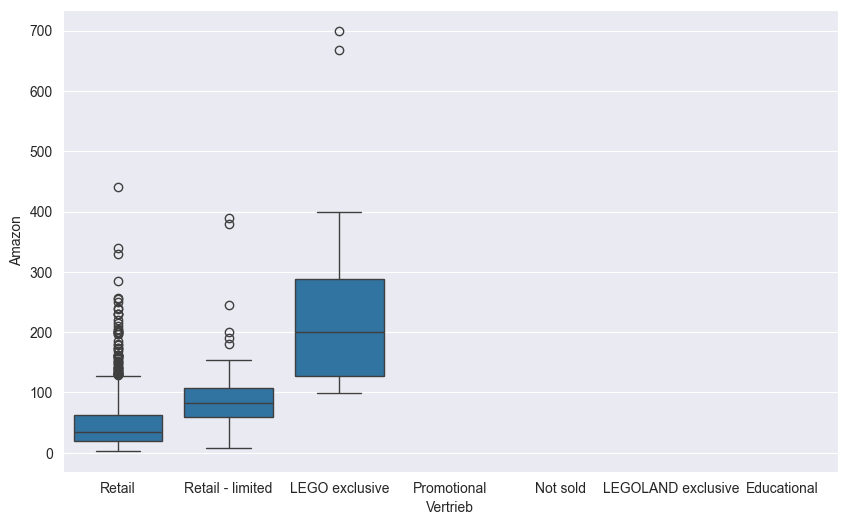

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vertrieb', y='Amazon', data=df)


### Interpretation
Im Boxplot ist zu erkennen, dass die `LEGO exclusive` Sets im Mittel am teuersten sind als die anderen Vertriebswege und am wenigsten Ausreißer. `Retail` ist im Mittel am günstigsten, hat jedoch die meisten Ausreißer, was darauf hindeutet, dass es einige Sets gibt, die teurer sind als die in den gezeigten Quantilen. `Retail - limited` und `Retail` sind im Mittel ähnlich teuer, jedoch hat `Retail` mehr Ausreißer als `Retail - limited`, jedoch weißt `Retail - limited` einen höheren Median auf und hat eine geringere Spannweite.

Über `Promotional Vertrieb`, `Not sold`, `LEGOLAND exclusive` und `Educational` kann keine Aussage getroffen werden, da hier keine Daten vorliegen.

## 1g) 1. Forschungsfrage

<Axes: xlabel='Teile', ylabel='Amazon'>

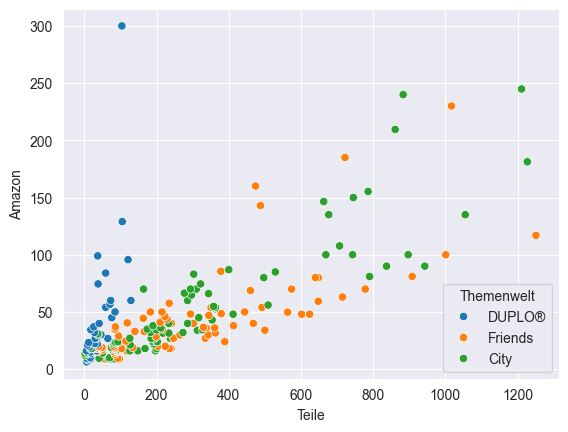

In [8]:
#chatgpt Anfang
df['Themenwelt'] = df['Themenwelt'].astype(str)

# Filter the DataFrame using apply with a lambda function
themes = ['City', 'DUPLO', 'Friends']
filtered_df = df[df['Themenwelt'].apply(lambda x: any(theme in x for theme in themes))]
#chatgpt Ende

sns.scatterplot(data=filtered_df, x='Teile', y='Amazon', hue='Themenwelt')

### Interpretation

Im Scatterplot ist zu erkennen, dass `Friends` und `City` eine höhere Streuung haben als `Duplo`, wobei `City` tendenziell mehr Teile aufweist als `Friends`. `Duplo` hat eine geringere Streuung und weniger Teile als die beiden anderen Themenwelten und ist tendenziell günstiger, bis auf einen Ausreißer bei etwa 300€ und ungefähr 100 Bauteilen und hat nie mehr als etwa 150 Bauteile. Alle Themenwelten haben eine relative hohe Anzahl an Sets zwischen 0 - 300 Teilen und 0 - 100€. Alle Themenwelten werden ebenfalls tendenziell teurer, je mehr Teile sie haben.

## 1h) Lineare Regression

                            OLS Regression Results                            
Dep. Variable:                 Amazon   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 14 Nov 2024   Prob (F-statistic):                nan
Time:                        17:27:36   Log-Likelihood:                    nan
No. Observations:                 205   AIC:                               nan
Df Residuals:                     203   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

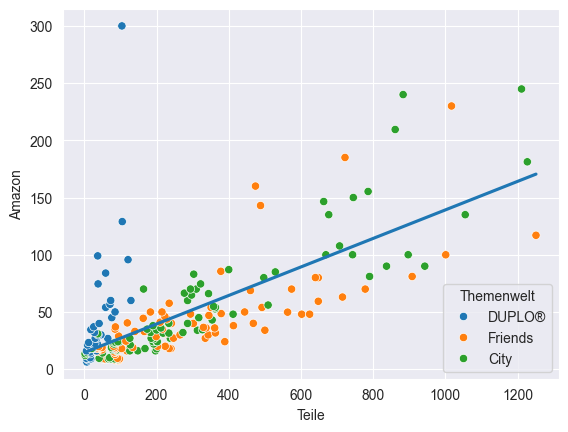

In [32]:
sns.scatterplot(data=filtered_df, x='Teile', y='Amazon', hue='Themenwelt')
sns.regplot(data=filtered_df, x='Teile', y='Amazon', scatter=False, ci=None)

model = smf.ols('Amazon ~ Teile', data=filtered_df).fit()
print(model.summary())
intercept = model.params['Intercept']
slope = model.params['Teile']
print(f"Regressionsformel: y= {slope} * x + {intercept}")

### Interpretation

Lineare Regressionsformel:
$y = mx + b$
$y = 0.12464064467971397x + 14.525193404152152$
$y \thickapprox 0.125x + 14.525$


Die Steigung der linearen Regression drückt aus, dass der Preis auf Amazon um 0.125€ steigt, wenn ein Teil hinzugefügt wird. Der y-Achsenabschnitt gibt den Preis auf Amazon an, wenn ein Set keine Teile hat, was in diesem Fall 14.525€ beträgt. Also ist der Initialpreis für ein Set bei etwa 14.525€.

Die Einheit der Steigung ist in diesem Fall Preis pro Bauteil (€/Teil).

## 1i) 2. Forschungsfrage

<Axes: xlabel='Teile', ylabel='Amazon'>

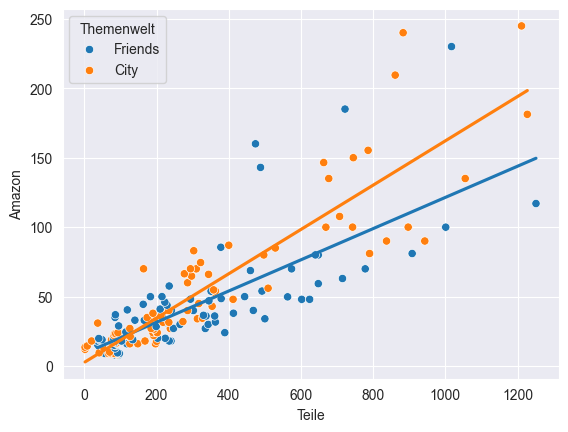

In [10]:
filtered_dfa = df[df['Themenwelt'].isin(['City', 'Friends'])]
sns.scatterplot(data=filtered_dfa, x='Teile', y='Amazon', hue='Themenwelt')

sns.regplot(data=df[df['Themenwelt'].isin(['Friends'])], x='Teile', y='Amazon', scatter=False, ci=None)
sns.regplot(data=df[df['Themenwelt'].isin(['City'])], x='Teile', y='Amazon', scatter=False, ci=None)


### Interpretation

Im Scatterplot ist zu erkennen, dass `City` tendenziell mehr Teile hat als `Friends` und auch teurer ist. Das bedeutet auch, dass die Steigung der Regressionsgeraden steiler ist als die Gerade von der `Friends` Themenwelt. Die `Friends` Themenwelt hat somit tendenziell weniger Teile, ist günstiger und hat deswegen eine flachere Steigung der Regressionsgeraden. Ebenfalls ist zu erkennen, dass die `City` Themenwelt Ausreißer hat, welche teurer sind als die Sets in der `Friends` Themenwelt, was für die höhere Steigung spricht. Aus dem Y-Achsenabschnitt der Regressionsgeraden ist ebenfalls zu erkennen, dass `Friends` einen höheren Startpreis hat als `City`.

## 1j) Lineare Regression Auswertung

In [11]:
model_city = smf.ols('Amazon ~ Teile', data=df[df['Themenwelt'].isin(['City'])]).fit()
model_friends = smf.ols('Amazon ~ Teile', data=df[df['Themenwelt'].isin(['Friends'])]).fit()
print(model_city.summary())
print(model_friends.summary())

intercept_city = model_city.params['Intercept']
slope_city = model_city.params['Teile']

intercept_friends = model_friends.params['Intercept']
slope_friends = model_friends.params['Teile']

print(f"Regressionsformel City: y= {slope_city} * x + {intercept_city}")
print(f"Regressionsformel Friends: y= {slope_friends} * x + {intercept_friends}")

                            OLS Regression Results                            
Dep. Variable:                 Amazon   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     376.5
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.34e-33
Time:                        16:55:07   Log-Likelihood:                -402.28
No. Observations:                  89   AIC:                             808.6
Df Residuals:                      87   BIC:                             813.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6098      3.485      0.749      0.4

### Interpretation

Lineare Regressionsformel `City`:
$y = mx + b$
$y = 0.15951564001055787x + 2.609794336058245$
$y \thickapprox 0.1595x + 2.6098$

Lineare Regressionsformel `Friends`:
$y = mx + b$
$y = 0.11232536191952064x + 9.063946186661237$
$y \thickapprox 0.1123x + 9.0639$

Wie schon in Aufgabe 1i) vermutet, hat `City` eine höhere Steigung als `Friends`. Somit auch einen höheren Preis/Teil.

Differenz Interzepte:
$9.0639 - 2.6098 = 6.4541$

Die Differenz der Y-Achsenabschnitte beträgt 6.4541€, was bedeutet, dass der Startpreis der Sets der beiden Themenwelten sich im Durschschnitt um 6.4541€ unterscheidet. `Friends` hat somit, wie vermutet, einen höheren Startpreis als `City`. Jedoch ist die Steigung von `City` höher, was bedeutet, dass der Preis schnell anwächst und höher ist als bei `Friends`.


## 1k) Kodierung

In [38]:
# chatgpt Anfang
df_1k = filtered_dfa.copy()
df_1k['Large'] = df_1k['Groesse'].apply(lambda x: 1 if x == 'Large' else 0)
df_1k['Small'] = df_1k['Groesse'].apply(lambda x: 1 if x == 'Small' else 0)
df_1k.loc[df['Groesse'] == 'NA', ['Large', 'Small']] = 0

df_1k[['Groesse', 'Large', 'Small']].sample(50)
# chatgpt Ende

,Groesse,Large,Small
973,Small,0,1
354,Small,0,1
848,Small,0,1
660,Small,0,1
520,Small,0,1
258,Small,0,1
670,Small,0,1
1122,Small,0,1
1257,Small,0,1
13,Small,0,1


## 1l) Lineare Regression

In [49]:
df_1l = df_1k.copy()
df_1l = df_1l.dropna()


model_1l = smf.ols('Amazon ~ Teile + Jahr + Seiten + Large + Small', data=df_1l).fit()
print(model_1l.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amazon   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     130.9
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           6.71e-33
Time:                        18:36:28   Log-Likelihood:                -436.54
No. Observations:                  95   AIC:                             881.1
Df Residuals:                      91   BIC:                             891.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9305.0632   3721.573      2.500      0.0

D:\Uni\5. Semester\Data Mining\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


### Interpretation

Die Signifikanztests zeigen, dass die Variablen `Teile` und `Jahr` signifikant sind, da deren p-Werte kleiner als 0.05 sind.


In [50]:
# chatgpt Anfang
# Regressionsgleichung für Small=1 und Large=0
intercept = model_1l.params['Intercept']
slope_teile = model_1l.params['Teile']
slope_jahr = model_1l.params['Jahr']
slope_seiten = model_1l.params['Seiten']
slope_small = model_1l.params['Small']

# Regressionsgleichung
regressionsgleichung = f"y = {slope_teile} * Teile + {slope_jahr} * Jahr + {slope_seiten} * Seiten + {slope_small} * Small + {intercept}"
print(regressionsgleichung)
# chatgpt Ende

y = 0.20471060530398003 * Teile + -9.216015536806918 * Jahr + -0.12523160263793978 * Seiten + 9305.063187523863 * Small + 9305.063187523741


Die Regressiongleichung für `Small=1` und `Large=0` lautet:
$y = 0.20471060530398003 * Teile + -9.216015536806918 * Jahr + -0.12523160263793978 * Seiten + 9305.063187523863 * Small + 9305.063187523741$


In [51]:
#Chatgpt Anfang
# Regressionsgleichung für Small=0 und Large=0
intercept = model_1l.params['Intercept']
slope_teile = model_1l.params['Teile']
slope_jahr = model_1l.params['Jahr']
slope_seiten = model_1l.params['Seiten']

# Regressionsgleichung
regressionsgleichung = f"y = {slope_teile} * Teile + {slope_jahr} * Jahr + {slope_seiten} * Seiten + {intercept}"
print(regressionsgleichung)
#Chatgpt Ende

y = 0.20471060530398003 * Teile + -9.216015536806918 * Jahr + -0.12523160263793978 * Seiten + 9305.063187523741


Die Regressiongleichung für `Small=0` und `Large=0` lautet:
$y = 0.20471060530398003 * Teile + -9.216015536806918 * Jahr + -0.12523160263793978 * Seiten + 9305.063187523741$

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_1l[["Teile", "Jahr", "Seiten", "Large", "Small"]]
y = df_1l["Amazon"]

X_test, X_train, y_test, y_train = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

X_train = sm.add_constant(X_train)
model_reg = sm.OLS(y_train, X_train).fit()
print(model_reg.summary())

y_pred = model_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

                            OLS Regression Results                            
Dep. Variable:                 Amazon   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     11.83
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           0.000310
Time:                        18:42:45   Log-Likelihood:                -83.653
No. Observations:                  19   AIC:                             175.3
Df Residuals:                      15   BIC:                             179.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Teile          0.1257      0.047      2.656      0.0

D:\Uni\5. Semester\Data Mining\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)
D:\Uni\5. Semester\Data Mining\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


MAE = 18.18767553907799

# 2) Schätzung

In [18]:
df2 = df.drop("Preis", axis=1)
df2.sample(5)

,Set_Nr,Set_Name,Themenwelt,Teile,Amazon,Jahr,Alter,Seiten,Minifiguren,Verpackung,Gewicht,Unique,Vertrieb,Groesse
518,75241,Action Battle Echo Base Defence,Star Wars,504.0,48.00,2019,Ages_8+,112.0,5.0,Box,NaN,192.0,Retail,Small
333,41427,Emma's Fashion Shop,Friends,343.0,29.95,2020,Ages_6+,112.0,2.0,Box,NaN,152.0,Retail,Small
755,72004,Tech Wizard Showdown,nan,506.0,138.99,2018,Ages_8-14,116.0,3.0,Box,NaN,197.0,Retail,NaN
133,41600,Aquaman,BrickHeadz,135.0,16.49,2018,Ages_10+,36.0,NaN,Box,NaN,40.0,NaN,Small
1191,30614,Lex Luthor,nan,4.0,NaN,2018,Ages_NA,NaN,1.0,Polybag,NaN,4.0,NaN,NaN


In [19]:
# mach für jede Themenwelt eine neue variable
for theme in df['Themenwelt'].unique():
    df2[theme] = df2['Themenwelt'].apply(lambda x: 1 if x == theme else 0)

df2

,Set_Nr,Set_Name,Themenwelt,Teile,Amazon,Jahr,Alter,Seiten,Minifiguren,Verpackung,...,Ideas,Creator Expert,LEGO® Art,Powered UP,Stranger Things,Monkie Kid,Xtra,Minifigures,LEGO® Brick Sketches,LEGO® Education
0,41916,Extra Dots - Series 2,DOTS,109.0,3.44,2020,Ages_6+,NaN,NaN,Foil pack,...,0,0,0,0,0,0,0,0,0,0
1,41908,Extra Dots - Series 1,DOTS,109.0,3.99,2020,Ages_6+,NaN,NaN,Foil pack,...,0,0,0,0,0,0,0,0,0,0
2,11006,Creative Blue Bricks,Classic,52.0,4.93,2020,Ages_4+,37.0,NaN,Box,...,0,0,0,0,0,0,0,0,0,0
3,11007,Creative Green Bricks,Classic,60.0,4.93,2020,Ages_4+,37.0,NaN,Box,...,0,0,0,0,0,0,0,0,0,0
4,41901,Funky Animals Bracelet,DOTS,33.0,4.99,2020,Ages_6+,NaN,NaN,Foil pack,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,NaN,2020,Ages_10+,NaN,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,NaN,2020,Ages_6+,NaN,2.0,Box,...,0,0,0,0,0,0,0,0,0,0
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,NaN,2020,Ages_8+,NaN,4.0,Box,...,0,0,0,0,0,0,0,0,0,0
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,NaN,2020,Ages_8+,NaN,NaN,Box,...,0,0,0,0,0,0,0,0,0,0


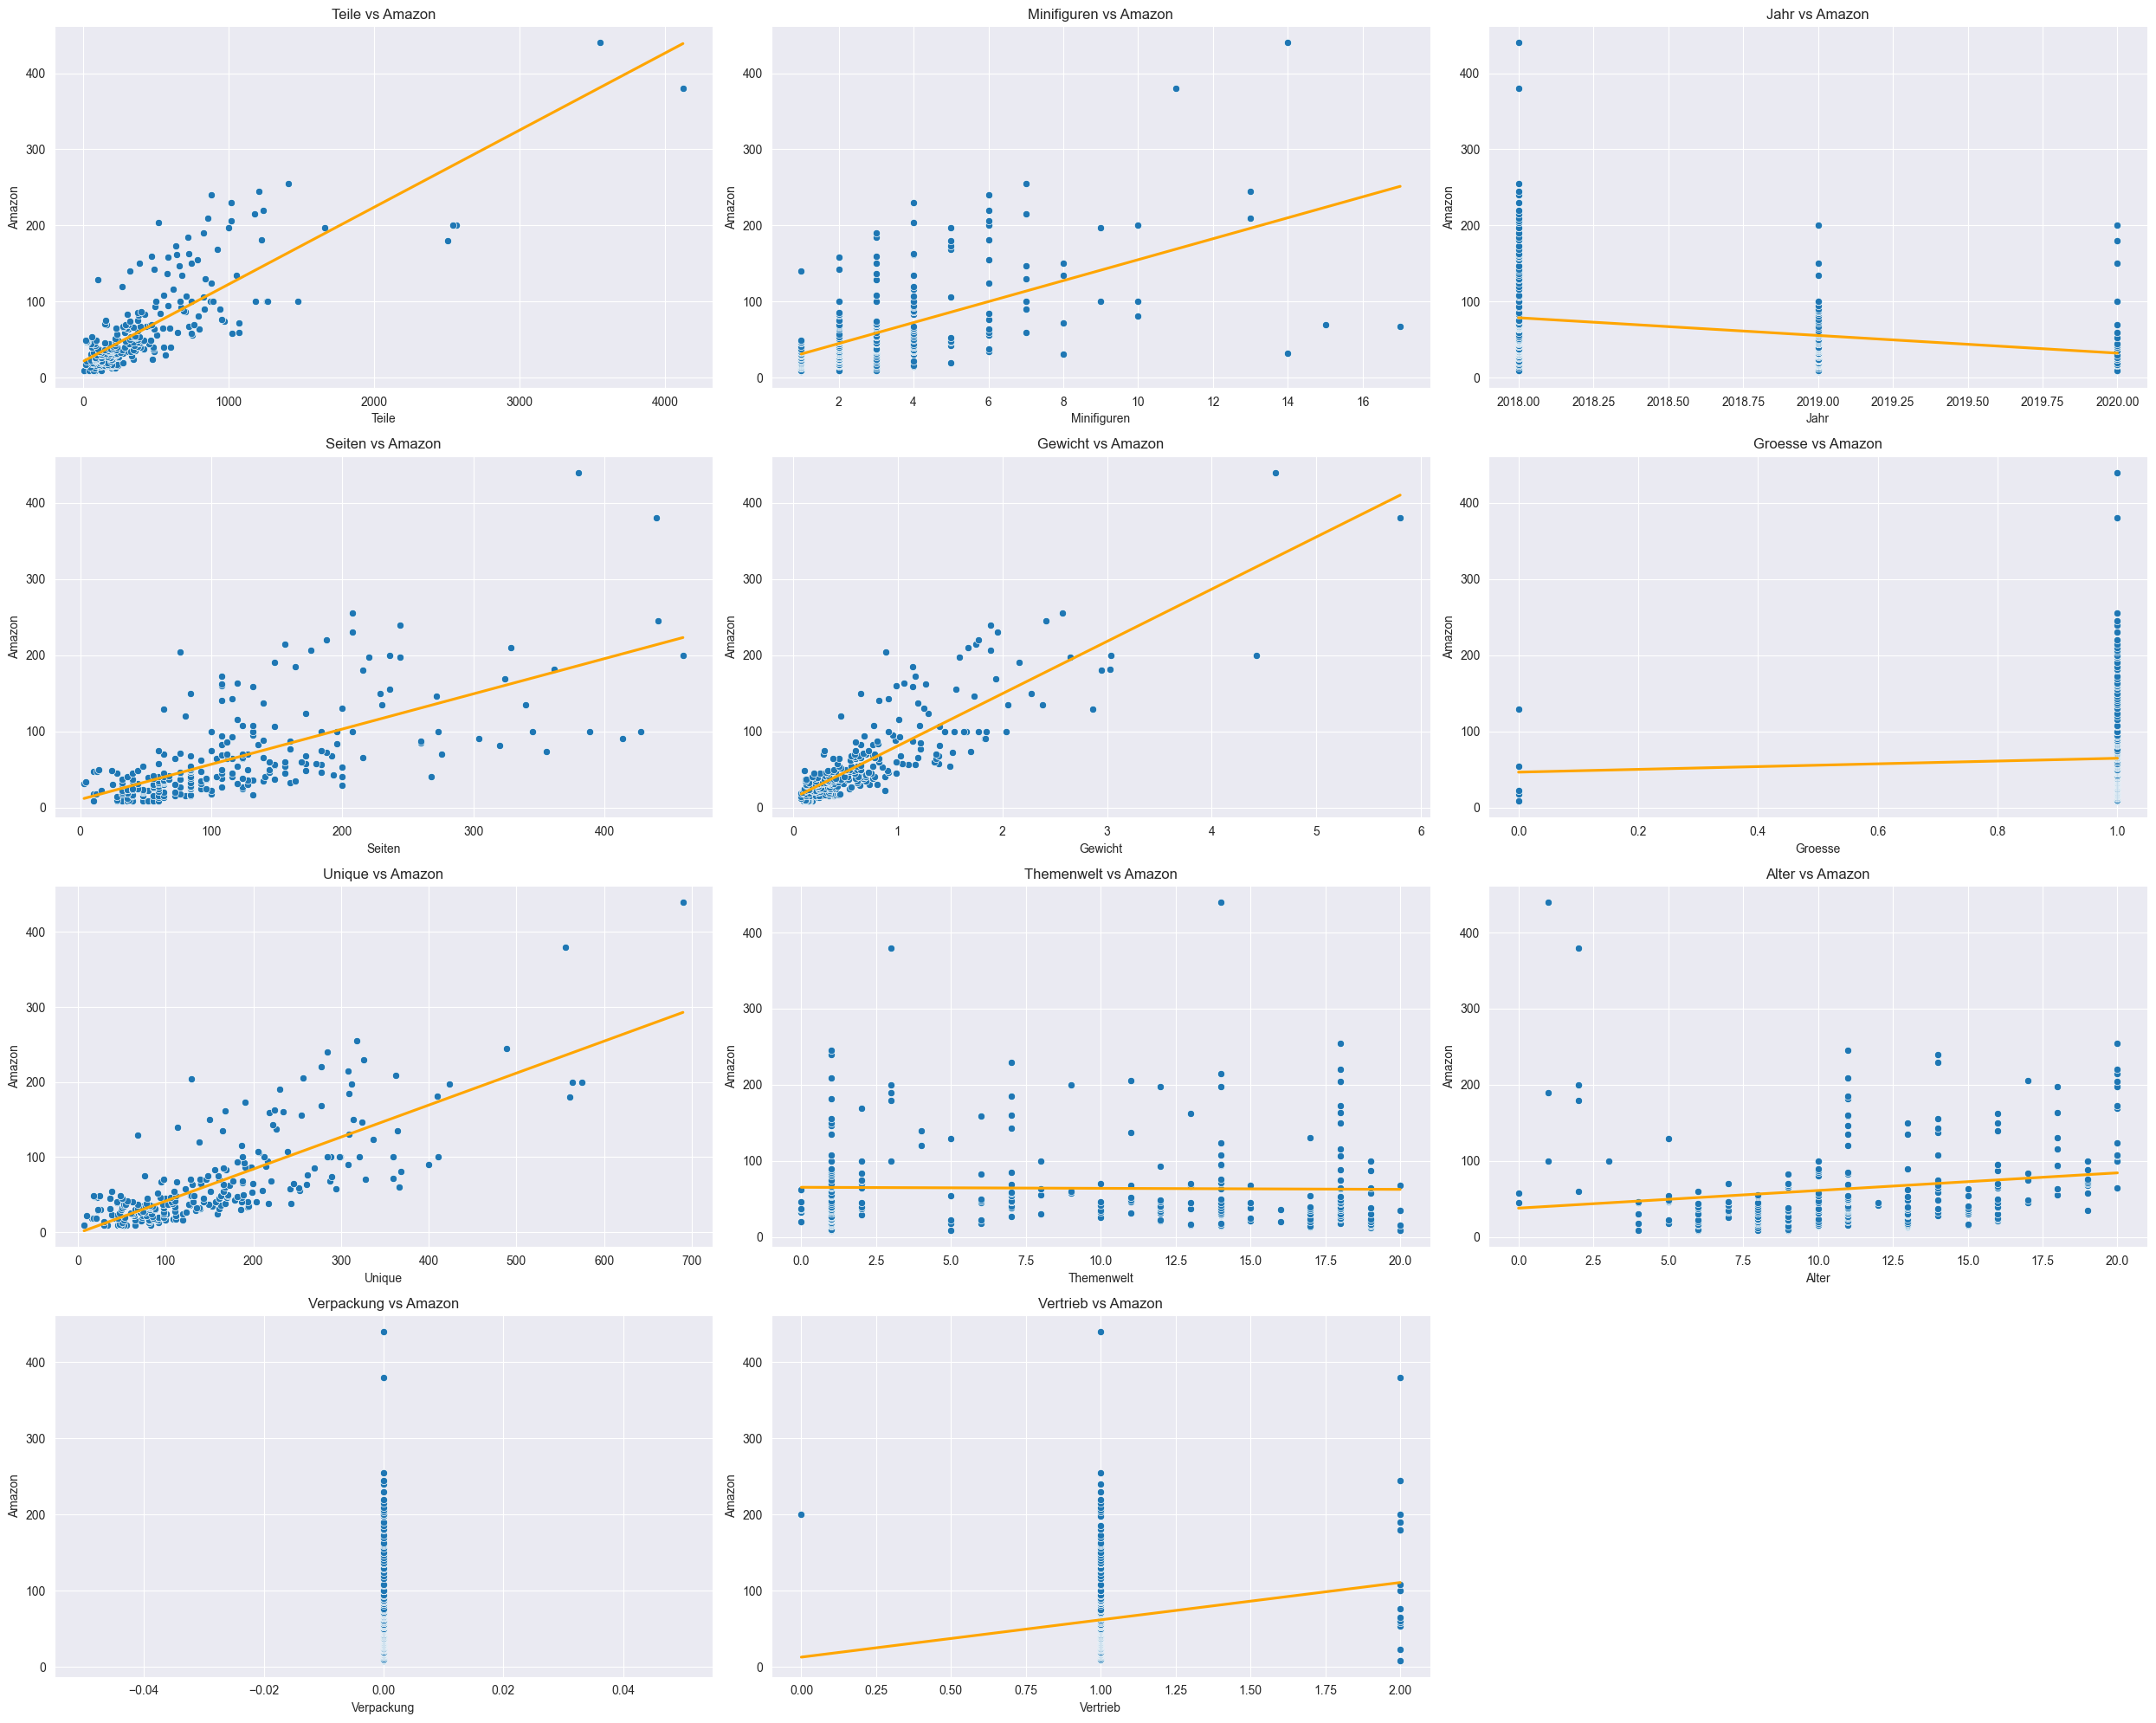

In [20]:
# Prüfen der linearen Beziehung zwischen den Features und dem Target

df_codiert2 = df.copy()
#df_codiert2['Large'] = df_codiert2['Groesse'].apply(lambda x: 1 if x == 'Large' else 0)
#df_codiert2['Small'] = df_codiert2['Groesse'].apply(lambda x: 1 if x == 'Small' else 0)
#df_codiert2.loc[df['Groesse'] == 'NA', ['Large', 'Small']] = 0
df_codiert2 = df_codiert2.dropna()
#Chatgpt Anfang
df_codiert2['Groesse'] = df_codiert2['Groesse'].astype('category')
df_codiert2['Groesse'] = df_codiert2['Groesse'].cat.codes
df_codiert2['Themenwelt'] = df_codiert2['Themenwelt'].astype('category')
df_codiert2['Themenwelt'] = df_codiert2['Themenwelt'].cat.codes
df_codiert2['Alter'] = df_codiert2['Alter'].astype('category')
df_codiert2['Alter'] = df_codiert2['Alter'].cat.codes
df_codiert2['Verpackung'] = df_codiert2['Verpackung'].astype('category')
df_codiert2['Verpackung'] = df_codiert2['Verpackung'].cat.codes
df_codiert2['Vertrieb'] = df_codiert2['Vertrieb'].astype('category')
df_codiert2['Vertrieb'] = df_codiert2['Vertrieb'].cat.codes

# gib jeder themenwelt eine eigene nummer in einer neuen variable

# Scatterplots für jedes Feature gegen das Target
features = ['Teile', 'Minifiguren', 'Jahr', 'Seiten', 'Gewicht', 'Groesse', 'Unique', 'Themenwelt', 'Alter', 'Verpackung', 'Vertrieb']
target = 'Amazon'

plt.figure(figsize=(25, 20))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(data=df_codiert2, x=feature, y=target)
    sns.regplot(data=df_codiert2, x=feature, y=target, scatter=False, ci=None, color='orange')
    plt.title(f'{feature} vs {target}')
plt.tight_layout()
plt.show()
#Chatgpt Ende

### Interpretation

Alle Scatterplots zeigen eine lineare Beziehung zwischen den Features und dem Target, wenn die nicht numerischen Daten in numerische Kategorien eingeteilt werden. Die Regressionsgeraden zeigen, dass die Features `Teile`, `Minifiguren`, `Seiten`, `Gewicht`, `Unique`, `Groesse` und `Verpackung` eine positive Steigung aufweisen, hingegen die Features `Jahr`, `Themenwelt`, und `Alter` eine negative Steigung aufweisen. Features, wie der `Set_Nr` und `Set_Name` und `Verpackung` wurde ebenfalls verzichtet, da diese keine lineare Beziehung zum Target aufweisen.

Aufgrund der geringen Aussagekraft von `Vertrieb`, `Themenwelt` und `Groesse` werden diese Features nicht in das kommende Modell aufgenommen. Die aussagekräftigsten Features sind `Teile`, `Minifiguren`, `Jahr`, `Seiten`, `Gewicht`, `Unique`, `Alter` und `Vertrieb`.

In [55]:
from sklearn.model_selection import train_test_split
X = df_codiert2[['Teile', 'Minifiguren', 'Jahr', 'Seiten', 'Gewicht', 'Unique', 'Alter', 'Vertrieb']]
y = df_codiert2['Amazon']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2, shuffle=True)
X_train = sm.add_constant(X_train)

model_task2 = sm.OLS(y_train, X_train).fit()
df_pred_train = sm.add_constant(X_train)
y_pred_train = model_task2.predict(df_pred_train)

r2_score(y_train, y_pred_train)


0.7751717805963348

In [56]:
    df_pred_test = sm.add_constant(X_test)
    y_pred_test = model_task2.predict(df_pred_test)

    r2_score(y_test, y_pred_test)

0.8780104561714508

### Interpretation

R2 Score Train = 0.775
R2 Score Test = 0.877

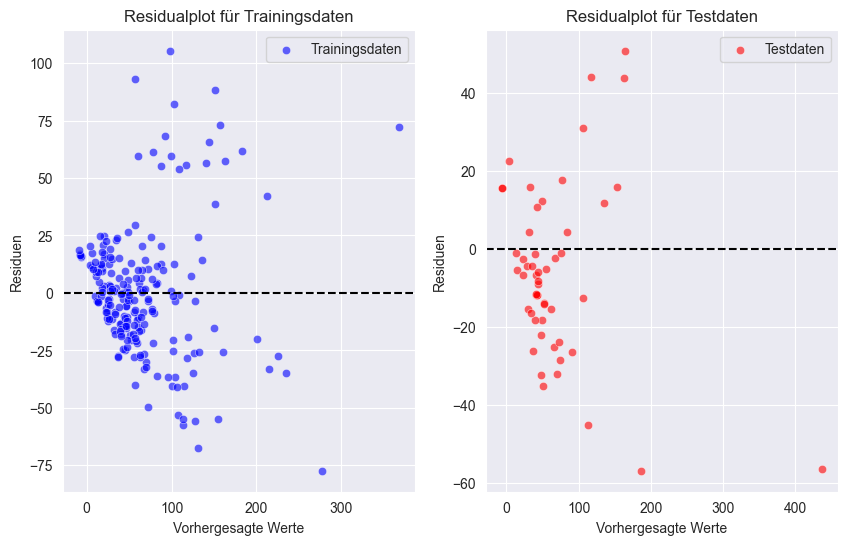

In [57]:
# ChatGPT Anfang
residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_train, y=residual_train, color='blue', label='Trainingsdaten', alpha=0.6)
plt.title("Residualplot für Trainingsdaten")
plt.xlabel("Vorhergesagte Werte")
plt.ylabel("Residuen")
plt.axhline(0, color='black', linestyle='--')
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_test, y=residual_test, color='red', label='Testdaten', alpha=0.6)
plt.title("Residualplot für Testdaten")
plt.xlabel("Vorhergesagte Werte")
plt.ylabel("Residuen")
plt.axhline(0, color='black', linestyle='--')
plt.legend()

plt.show()
# ChatGPT Ende

### Interpretation

Im Residualplot der Trainingsdaten ist zu erkennen, dass eine hohe Anzahl an Daten eine vergleichweise kleine Abweichung zum tatsächlichen Wert aufweisen. Jedoch gibt es Ausreißer von einer Abweichung von etwa +105 und im negativen Bereich von bis zu etwa -80.
Der Residualplot der Testdaten zeigt eine ähnliche Verteilung, jedoch mit weniger Ausreißern. Die Abweichungen liegen hierbei zwischen etwa +55 und -58. Insgesamt ist zu erkennen, dass die Residuen im Testdatenplot weniger stark streuen als im Trainingsdatenplot.

In [64]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training data
mae_train = mean_absolute_error(y_train, y_pred_train)
print("MAE (Train):", mae_train)

# Calculate MAE for test data
mae_test = mean_absolute_error(y_test, y_pred_test)
print("MAE (Test):", mae_test)

MAE (Train): 20.163581354985933
MAE (Test): 18.176307769015132


# Overfitting

Aufgrund einer kleinen Datenmenge, welche ebenfalls nochmals durch die Verwendung der dropna()-Funktion verkleinert wird und der Verwendung von zu vielen Features, kann es zu Overfitting kommen. Auch der MAE Score ist auf den Testdaten höher als auf den Trainingsdaten, was ebenfalls auf Overfitting hindeutet. Jedoch liegt bei den Testdaten eine geringere Datenmenge vor, was den kleinen Unterschied zwischen den MAE Scores erklären könnte. Dadurch gibt es keine klaren Anzeichen für Overfitting.

In [66]:
#  Gebt am Ende die Parameter des Prognosemodells an, das ihr für die Prognose neuer Sets mit unbekannter Themenwelt einsetzen wollt.

intercept = model_task2.params['const']
slope_teile = model_task2.params['Teile']
slope_minifiguren = model_task2.params['Minifiguren']
slope_jahr = model_task2.params['Jahr']
slope_seiten = model_task2.params['Seiten']
slope_gewicht = model_task2.params['Gewicht']
slope_unique = model_task2.params['Unique']
slope_alter = model_task2.params['Alter']
slope_vertrieb = model_task2.params['Vertrieb']

print("intercept", intercept)
print("Teile", slope_teile)
print("Minifiguren", slope_minifiguren)
print("Jahr", slope_jahr)
print("Seiten", slope_seiten)
print("Gewicht", slope_gewicht)
print("Unique", slope_unique)
print("Alter", slope_alter)
print("Vertrieb", slope_vertrieb)

intercept 38880.51527884368
Teile 0.02532646793493619
Minifiguren 1.8763587425598032
Jahr -19.25659072301532
Seiten -0.06815333841917523
Gewicht 56.410709763402174
Unique 0.0002663060297615205
Alter 0.8168710929992182
Vertrieb -4.193421426357659


### Parameter des Prognosemodells
intercept 38880.51527884368
Teile 0.02532646793493619
Minifiguren 1.8763587425598032
Jahr -19.25659072301532
Seiten -0.06815333841917523
Gewicht 56.410709763402174
Unique 0.0002663060297615205
Alter 0.8168710929992182
Vertrieb -4.193421426357659